In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [ ]:
pip install lightgbm

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [ ]:

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#Data Loading and Preprocessing

In [ ]:
csv_file_path = "/content/hypothyroid.csv"
df = pd.read_csv(csv_file_path)

# Remove rows containing "?" values
df = df[(df != "?").all(axis=1)]

# Map binary values
# Replace ... with the actual binary column names
binary_cols = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
for col in binary_cols:
    df[col] = df[col].map({'t': 1, 'f': 0})

# Encode categorical columns
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['binaryClass'] = df['binaryClass'].map({'P': 1, 'N': 0})
df['referral source'] = LabelEncoder().fit_transform(df['referral source'])

# Split data into features and target
X = df.drop('binaryClass', axis=1)
y = df['binaryClass']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Exploratory Data Analysis (EDA)

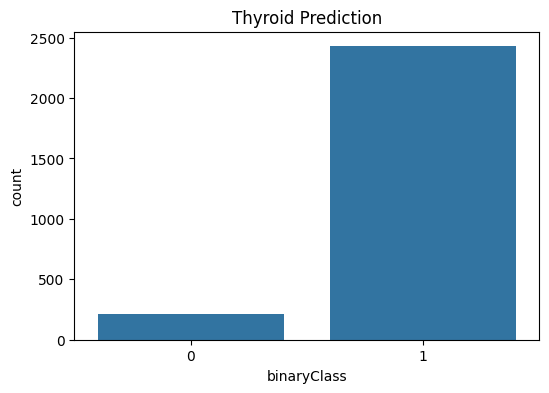

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='binaryClass', data=df)
plt.title('Thyroid Prediction')
plt.show()


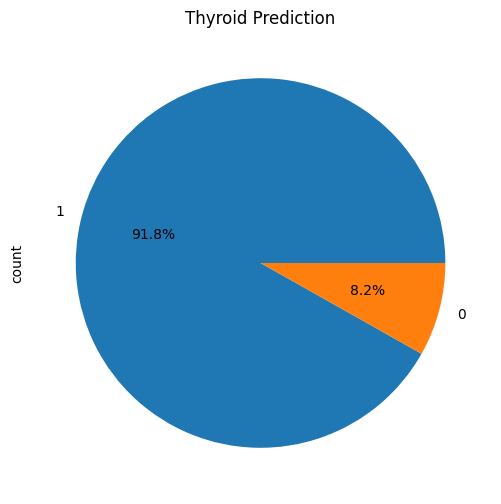

In [ ]:
plt.figure(figsize=(6, 6))
df['binaryClass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Thyroid Prediction')
plt.show()


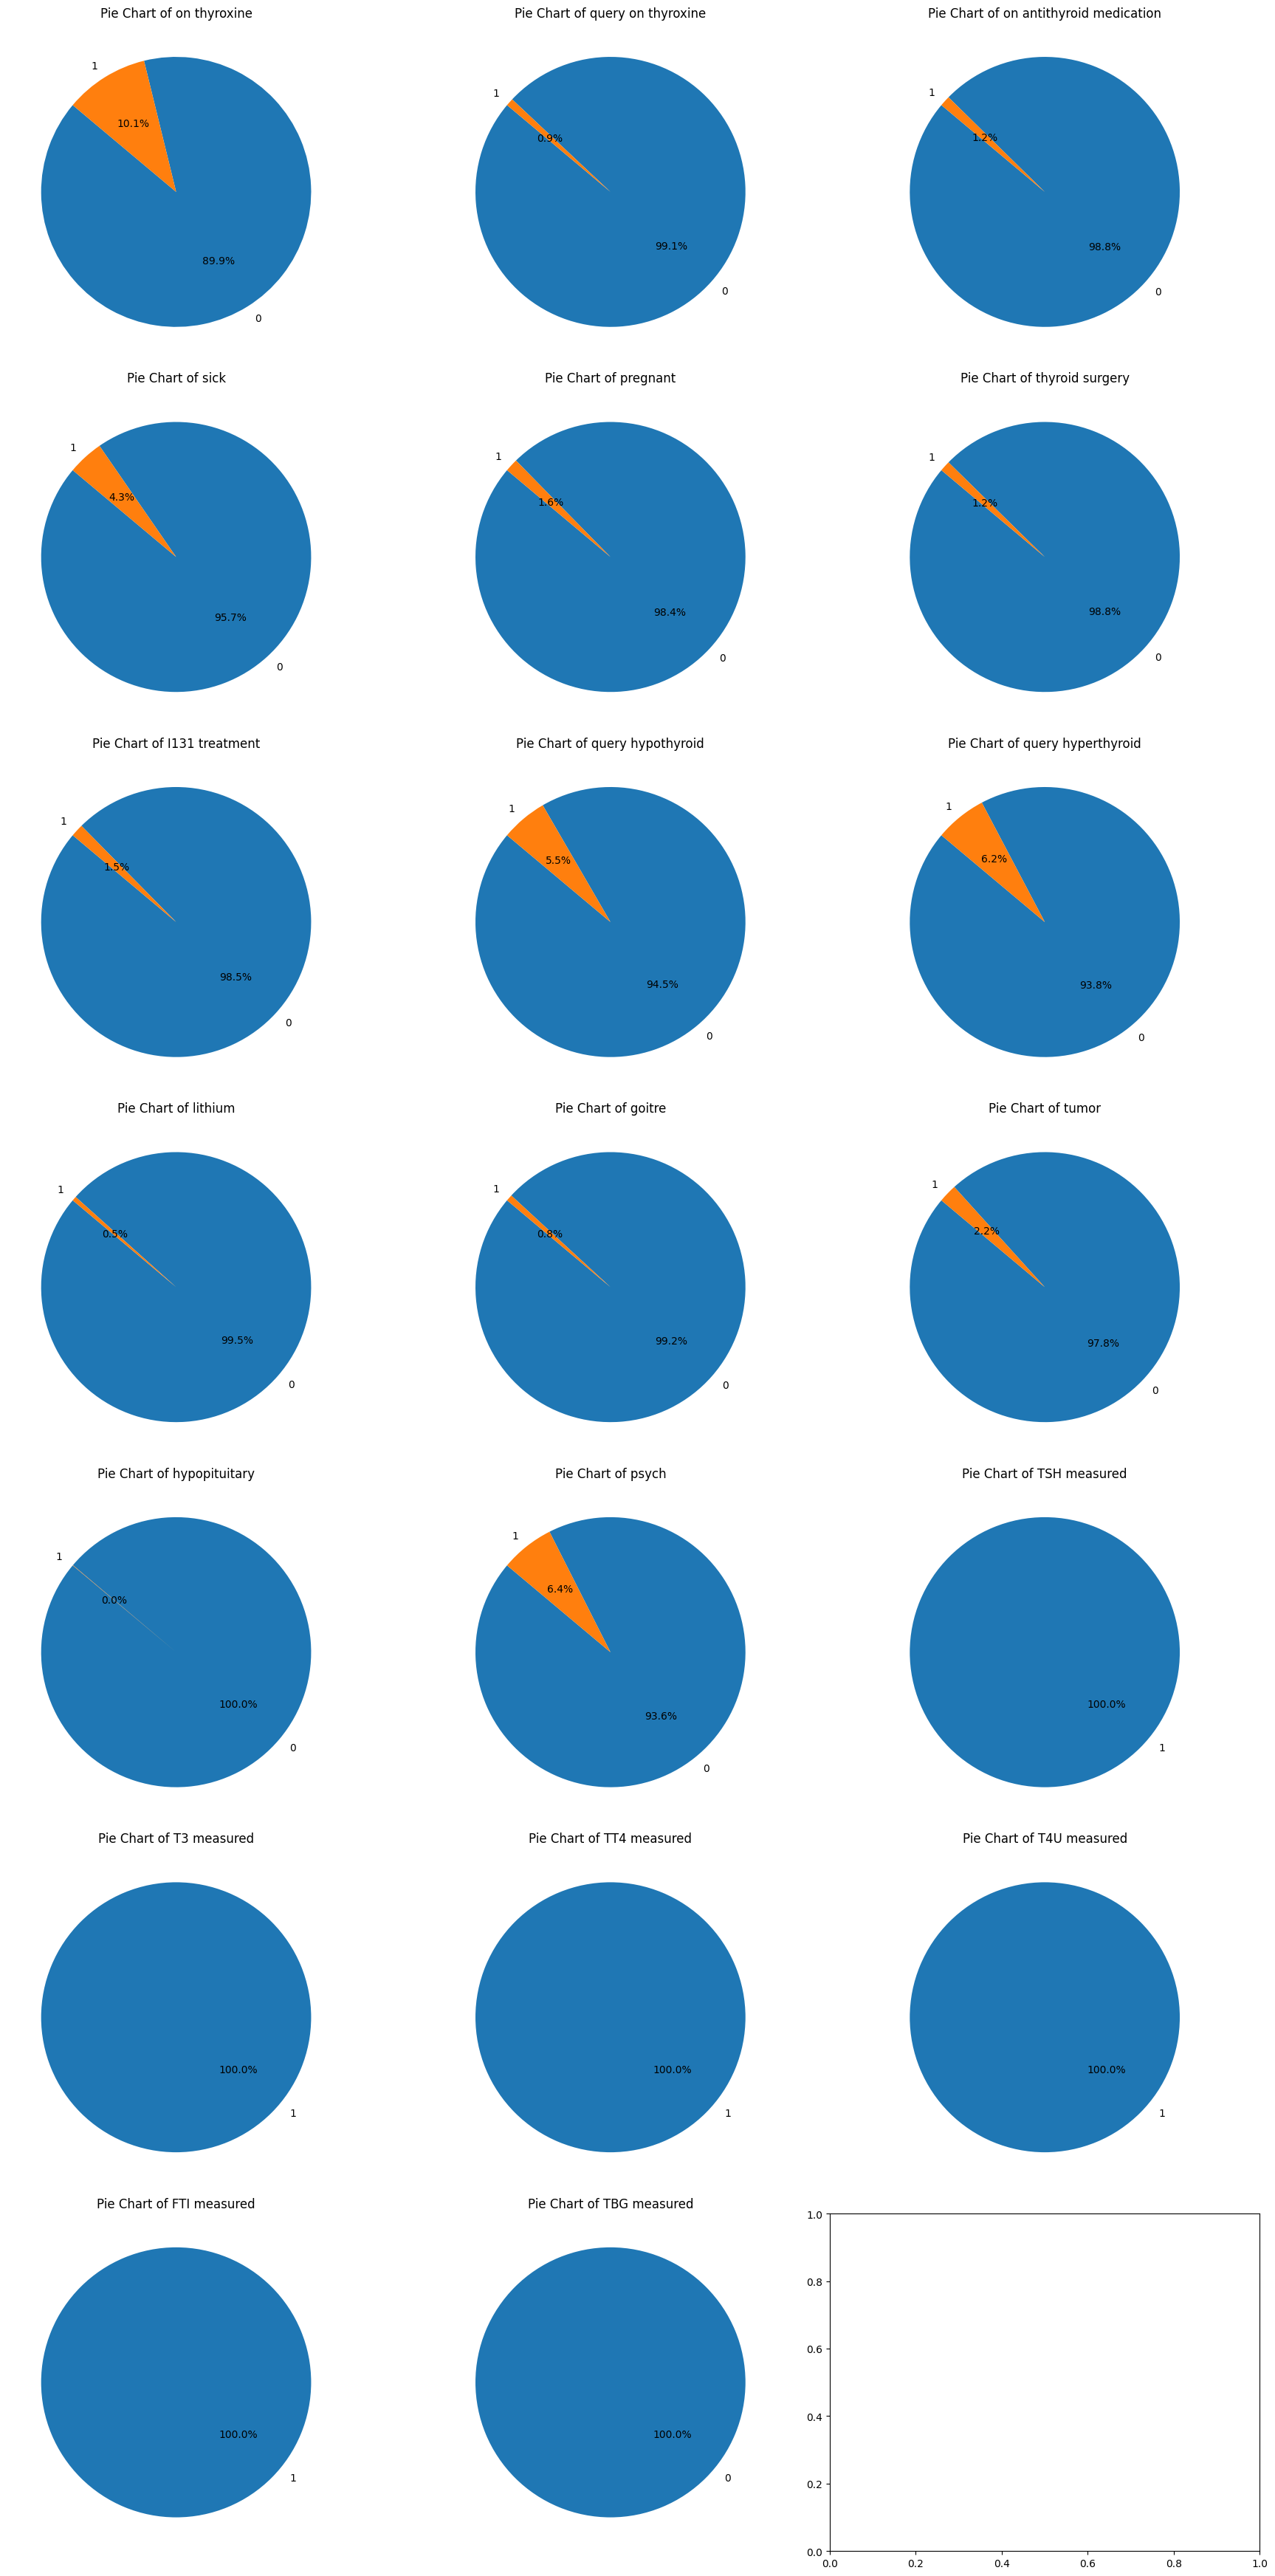

In [ ]:
num_rows = int(len(binary_cols) / 3) + (len(binary_cols) % 3 > 0) # Calculate num_rows based on the number of binary_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))

for i, col in enumerate(binary_cols):

    # Check if the current index 'i' is within the bounds of the axes array
    if i < len(axes.flatten()):
        category_counts = df[col].value_counts()
        axes.flatten()[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
        axes.flatten()[i].set_title(f'Pie Chart of {col}')


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
#Model Training and Evaluation

In [ ]:
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:28:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
def plot_feature_importance(model, feature_names):
    ...
    plt.barh(feature_importance.index, feature_importance)
    plt.title('Feature Importance')
    plt.show()


In [ ]:
model_mlp = MLPClassifier(random_state=42)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)


In [ ]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)


In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [ ]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)


In [ ]:
#Model Comparison with PCA

In [ ]:
!pip install scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_xgb_pca = XGBClassifier(random_state=42)
model_xgb_pca.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
cv_scores_train = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_test = cross_val_score(model_xgb, X_test, y_test, cv=5, scoring='accuracy')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
#Hyperparameter Tuning
!pip install scikit-learn
from sklearn.model_selection import GridSearchCV # Importing the GridSearchCV class
from sklearn.model_selection import cross_val_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:36:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

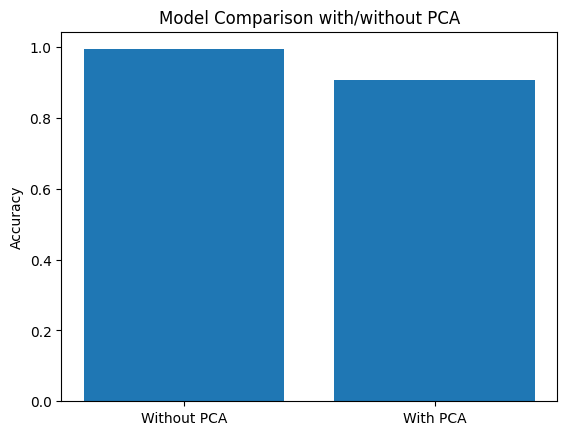

In [ ]:


!pip install matplotlib scikit-learn xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# Assuming X_test, y_test, model_xgb, and model_xgb_pca are defined and available

# Calculate accuracy for model_xgb
y_pred_xgb = model_xgb.predict(X_test)
accuracy_test_xgb = accuracy_score(y_test, y_pred_xgb)

# Calculate accuracy for model_xgb_pca
y_pred_xgb_pca = model_xgb_pca.predict(X_test_pca)
accuracy_test_xgb_pca = accuracy_score(y_test, y_pred_xgb_pca)

# Now you can plot the accuracies
plt.bar(['Without PCA', 'With PCA'], [accuracy_test_xgb, accuracy_test_xgb_pca])
plt.ylabel('Accuracy')
plt.title('Model Comparison with/without PCA')
plt.show()

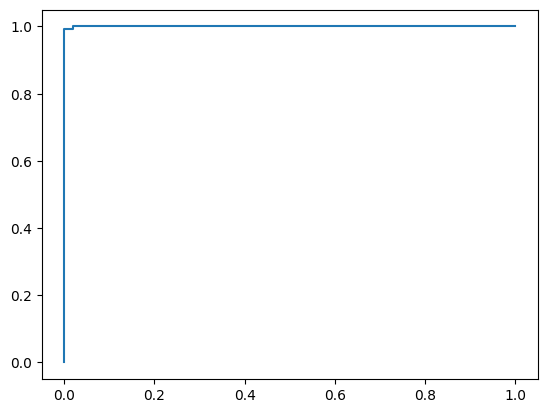

In [ ]:
probs = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label='XGBoost')


In [ ]:
#Saving the Model

In [ ]:
import joblib
joblib.dump(model_xgb, 'xgb_model.pkl')


['xgb_model.pkl']